In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

UPLOADING CSV FILE

In [56]:
df=pd.read_csv('/content/healthcare_patient_data.xlsx - Sheet1.csv')
df.head()

,Patient ID,Age,Gender,BMI,Blood Pressure,Cholesterol,Smoking,Exercise Hours,Diagnosis,Treatment Cost,Region
0,P00001,32,M,20.3,135/88,259,No,3,Heart Disease,5802,East
1,P00002,61,F,18.2,100/65,230,Yes,4,Diabetes,3443,East
2,P00003,48,M,28.3,138/90,257,Yes,7,Diabetes,3302,East
3,P00004,35,F,30.4,120/80,235,Yes,6,Heart Disease,4996,North
4,P00005,43,M,33.6,100/65,218,No,6,Diabetes,3288,East


**ANALYSING DATA**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient ID      35000 non-null  object 
 1   Age             35000 non-null  int64  
 2   Gender          35000 non-null  object 
 3   BMI             35000 non-null  float64
 4   Blood Pressure  35000 non-null  object 
 5   Cholesterol     35000 non-null  int64  
 6   Smoking         35000 non-null  object 
 7   Exercise Hours  35000 non-null  int64  
 8   Diagnosis       26251 non-null  object 
 9   Treatment Cost  35000 non-null  int64  
 10  Region          35000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.9+ MB


Data Exploration and Cleaning
Tasks:
- Load and inspect the dataset, understanding key attributes such as Diagnosis, Blood Pressure, and Treatment Cost.
- Identify missing values and handle data inconsistencies.
- Preprocess data:
-Split Blood Pressure into Systolic and Diastolic numerical columns.
-  Convert Smoking status into a Boolean format (True/False).
-  Handle missing values in Exercise Hours (e.g., impute using the median).


In [58]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
Hypertension,8836
Diabetes,8711
Heart Disease,8704


In [59]:
df['Treatment Cost'].describe()

,Treatment Cost
count,35000.000000
mean,2469.280886
std,1776.684292
min,100.000000
25%,1200.000000
50%,1993.000000
75%,3494.000000
max,6000.000000


In [60]:
df.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
BMI,0
Blood Pressure,0
Cholesterol,0
Smoking,0
Exercise Hours,0
Diagnosis,8749
Treatment Cost,0


In [61]:
df['Diagnosis']=df.Diagnosis.fillna(df.Diagnosis.mode()[0])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient ID      35000 non-null  object 
 1   Age             35000 non-null  int64  
 2   Gender          35000 non-null  object 
 3   BMI             35000 non-null  float64
 4   Blood Pressure  35000 non-null  object 
 5   Cholesterol     35000 non-null  int64  
 6   Smoking         35000 non-null  object 
 7   Exercise Hours  35000 non-null  int64  
 8   Diagnosis       35000 non-null  object 
 9   Treatment Cost  35000 non-null  int64  
 10  Region          35000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.9+ MB


In [63]:
df[['Systolic_bp','Diastolic_bp']]=df['Blood Pressure'].str.split('/',expand=True).astype(float)

In [64]:
df.head(2)

,Patient ID,Age,Gender,BMI,Blood Pressure,Cholesterol,Smoking,Exercise Hours,Diagnosis,Treatment Cost,Region,Systolic_bp,Diastolic_bp
0,P00001,32,M,20.3,135/88,259,No,3,Heart Disease,5802,East,135.0,88.0
1,P00002,61,F,18.2,100/65,230,Yes,4,Diabetes,3443,East,100.0,65.0


In [65]:
df.drop('Blood Pressure',axis=1,inplace=True)

In [66]:
df.head()

,Patient ID,Age,Gender,BMI,Cholesterol,Smoking,Exercise Hours,Diagnosis,Treatment Cost,Region,Systolic_bp,Diastolic_bp
0,P00001,32,M,20.3,259,No,3,Heart Disease,5802,East,135.0,88.0
1,P00002,61,F,18.2,230,Yes,4,Diabetes,3443,East,100.0,65.0
2,P00003,48,M,28.3,257,Yes,7,Diabetes,3302,East,138.0,90.0
3,P00004,35,F,30.4,235,Yes,6,Heart Disease,4996,North,120.0,80.0
4,P00005,43,M,33.6,218,No,6,Diabetes,3288,East,100.0,65.0


In [67]:
df['Smoking']=df['Smoking'].map({'Yes':True,'No':False})

In [68]:
df.head(2)

,Patient ID,Age,Gender,BMI,Cholesterol,Smoking,Exercise Hours,Diagnosis,Treatment Cost,Region,Systolic_bp,Diastolic_bp
0,P00001,32,M,20.3,259,False,3,Heart Disease,5802,East,135.0,88.0
1,P00002,61,F,18.2,230,True,4,Diabetes,3443,East,100.0,65.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient ID      35000 non-null  object 
 1   Age             35000 non-null  int64  
 2   Gender          35000 non-null  object 
 3   BMI             35000 non-null  float64
 4   Cholesterol     35000 non-null  int64  
 5   Smoking         35000 non-null  bool   
 6   Exercise Hours  35000 non-null  int64  
 7   Diagnosis       35000 non-null  object 
 8   Treatment Cost  35000 non-null  int64  
 9   Region          35000 non-null  object 
 10  Systolic_bp     35000 non-null  float64
 11  Diastolic_bp    35000 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 3.0+ MB


Health Trends and Lifestyle Analysis
Tasks:
- Investigate the relationship between lifestyle choices and diagnoses.
- Analyze how smoking and exercise habits correlate with health conditions (e.g., Diabetes prevalence in sedentary patients).
- Create visualizations:
-  Heatmaps (e.g., BMI vs. Cholesterol levels).
-  Grouped bar charts (e.g., Diagnosis frequency by Gender).


In [70]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
Hypertension,17585
Diabetes,8711
Heart Disease,8704


In [71]:
smoking_diagnoise=df.groupby(['Diagnosis','Smoking']).agg({'Smoking':'count'})

In [72]:
smoking_diagnoise

Smoking
Diagnosis     Smoking         
Diabetes      False       4270
              True        4441
Heart Disease False       4313
              True        4391
Hypertension  False       8707
              True        8878

In [73]:
smoking_diagnoise1=df.groupby(['Diagnosis','Smoking','Gender']).size().reset_index(name='count')

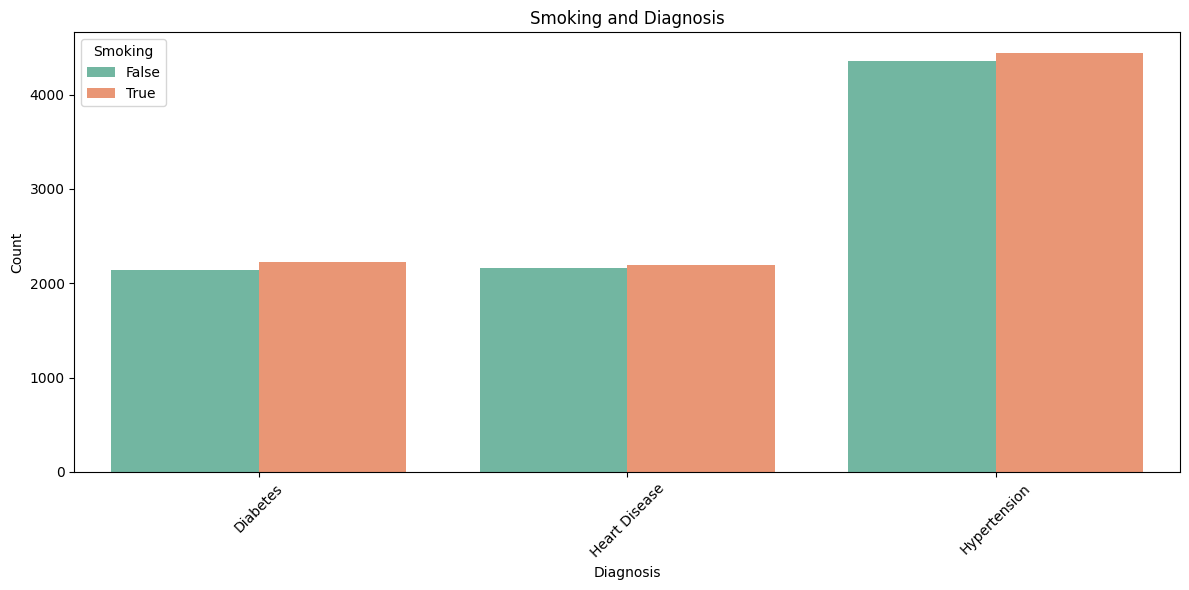

In [74]:
plt.figure(figsize=(12,6))
sns.barplot(data=smoking_diagnoise1,x='Diagnosis',y='count',hue='Smoking',palette='Set2',ci=None)
plt.title('Smoking and Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
Cholesterol_diagnoise=df.groupby(['Diagnosis','Cholesterol']).agg({'Cholesterol':'count'})

In [76]:
Cholesterol_diagnoise

Cholesterol
Diagnosis    Cholesterol             
Diabetes     160                   73
             161                   74
             162                   70
             163                   76
             164                   93
...                               ...
Hypertension 266                  171
             267                  157
             268                  156
             269                  166
             270                  152

[333 rows x 1 columns]

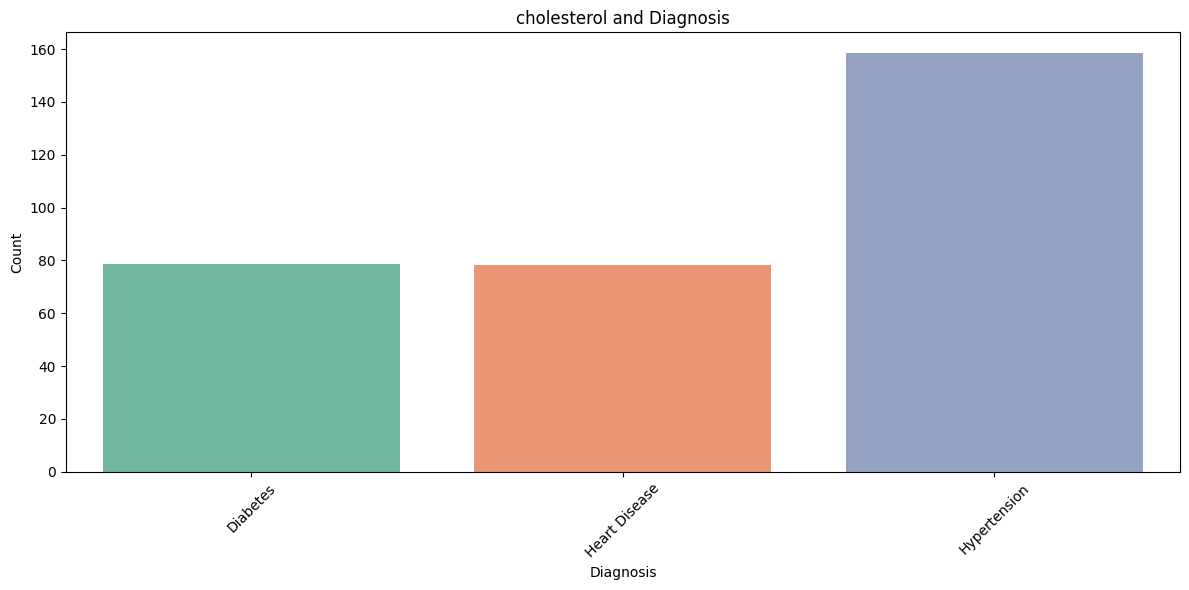

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=Cholesterol_diagnoise,x='Diagnosis',y='Cholesterol',palette='Set2',ci=None)
plt.title('cholesterol and Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
df_smoker = df[df['Smoking'] == True]

In [79]:
df_smoker

,Patient ID,Age,Gender,BMI,Cholesterol,Smoking,Exercise Hours,Diagnosis,Treatment Cost,Region,Systolic_bp,Diastolic_bp
1,P00002,61,F,18.2,230,True,4,Diabetes,3443,East,100.0,65.0
2,P00003,48,M,28.3,257,True,7,Diabetes,3302,East,138.0,90.0
3,P00004,35,F,30.4,235,True,6,Heart Disease,4996,North,120.0,80.0
6,P00007,59,F,31.8,225,True,7,Hypertension,358,North,145.0,95.0
10,P00011,42,M,20.4,220,True,4,Heart Disease,5486,South,115.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34984,P34985,37,F,32.7,252,True,3,Diabetes,2699,North,100.0,65.0
34985,P34986,37,F,28.5,218,True,2,Heart Disease,4957,East,138.0,90.0
34987,P34988,24,M,26.9,174,True,0,Hypertension,1567,South,138.0,90.0
34989,P34990,71,M,23.1,230,True,7,Heart Disease,4647,East,110.0,70.0


In [80]:
df1_smoker=df_smoker.groupby(['Diagnosis','Gender']).agg({'Smoking':'count','Gender':'count'})

In [81]:
df1_smoker

Smoking  Gender
Diagnosis     Gender                 
Diabetes      F          2242    2242
              M          2199    2199
Heart Disease F          2245    2245
              M          2146    2146
Hypertension  F          4519    4519
              M          4359    4359

Cost Analysis
Tasks:
- Examine the impact of diagnosis severity on treatment costs (e.g., comparing costs for Heart Disease vs. Hypertension).
- Visualize cost distributions:
-  Box plots (e.g., Treatment Cost by Diagnosis category).
-  Scatter plots (e.g., Age vs. Treatment Cost).


In [82]:
df_treatment=df.groupby(['Diagnosis','Treatment Cost']).agg({'Treatment Cost':'count'})

In [83]:
df_treatment

Treatment Cost
Diagnosis    Treatment Cost                
Diabetes     2500                         5
             2501                         6
             2502                         8
             2503                         4
             2504                         9
...                                     ...
Hypertension 1996                         8
             1997                         7
             1998                         7
             1999                        14
             2000                         9

[4178 rows x 1 columns]

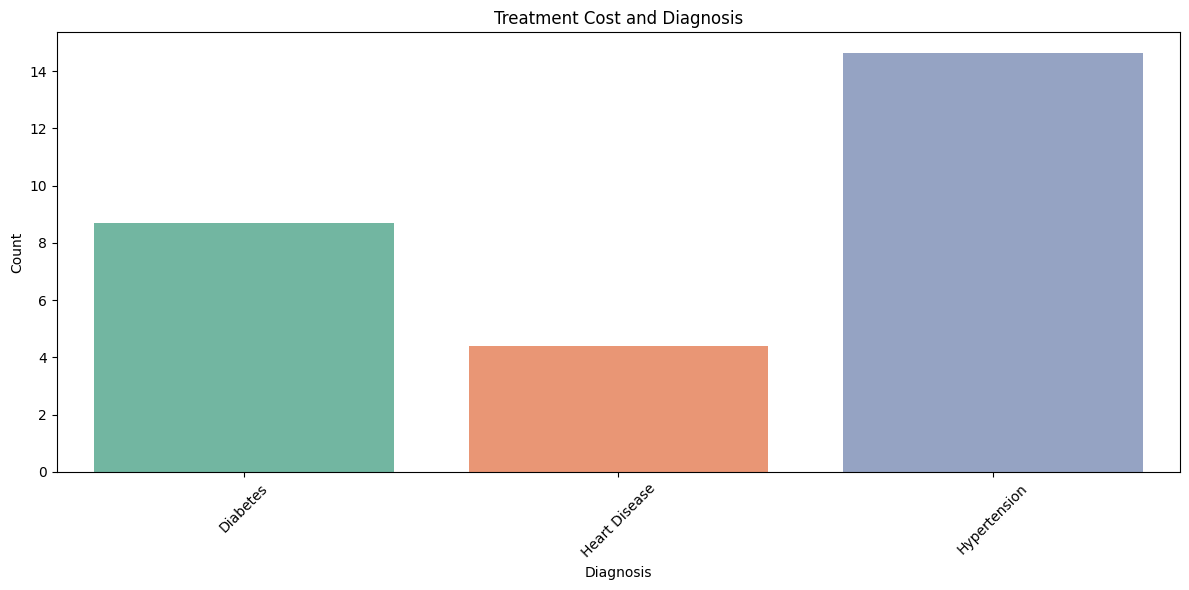

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_treatment,x='Diagnosis',y='Treatment Cost',palette='Set2',ci=None)
plt.title('Treatment Cost and Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
import plotly.express as px
import pandas as pd

# Prepare the data
df_treatment = (
    df.groupby(['Diagnosis', 'Treatment Cost'])
    .agg(Count=('Treatment Cost', 'count'))
    .reset_index()
)

# Create an interactive line graph
fig = px.line(
    df_treatment,
    x='Treatment Cost',
    y='Count',
    color='Diagnosis',
    title='<b>Treatment Cost Frequency by Diagnosis</b>',
    labels={'Treatment Cost': 'Treatment Cost ($)', 'Count': 'Number of Treatments'},
    line_shape='spline',  # Smooth curved lines
    render_mode='svg',    # Crisp lines
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Vivid,  # Bright, distinct colors
    hover_data={'Diagnosis': True, 'Treatment Cost': ':.2f', 'Count': True},
)

# Enhance readability and aesthetics
fig.update_layout(
    font_family='Arial',
    hovermode='x unified',  # Shows all y-values at a given x on hover
    xaxis=dict(
        title='Treatment Cost ($)',
        showgrid=True,
        gridcolor='lightgrey',
        tickformat='$,.0f',  # Format as currency
    ),
    yaxis=dict(
        title='Number of Treatments',
        showgrid=True,
        gridcolor='lightgrey',
    ),
    legend=dict(
        title='Diagnosis',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
    ),
    height=600,
    plot_bgcolor='white',
)

# Add interactive features
fig.update_traces(
    line=dict(width=2.5),
    hovertemplate=(
        '<b>%{fullData.name}</b><br>'
        'Cost: <b>%{x:$,.0f}</b><br>'
        'Count: <b>%{y}</b>'
    ),
)

# Add a helpful annotation
fig.add_annotation(
    text="Hover over lines to see details",
    xref="paper", yref="paper",
    x=0.05, y=0.95,
    showarrow=False,
    bgcolor='white',
    bordercolor='lightgrey',
)

fig.show()

In [86]:
import plotly.express as px
import pandas as pd

# Prepare the data
df_treatment = (
    df.groupby(['Diagnosis', 'Treatment Cost'])
    .agg(Treatment_Count=('Treatment Cost', 'count'))
    .reset_index()
)

# Create interactive scatter plot
fig = px.scatter(
    df_treatment,
    x='Treatment Cost',
    y='Treatment_Count',
    color='Diagnosis',
    size='Treatment_Count',
    hover_name='Diagnosis',
    hover_data={'Treatment Cost': ':.2f', 'Treatment_Count': True},
    title='<b>Treatment Cost vs. Frequency</b><br><i>Size indicates number of occurrences</i>',
    labels={
        'Treatment Cost': 'Cost ($)',
        'Treatment_Count': 'Number of Treatments'
    },
    color_discrete_sequence=px.colors.qualitative.Plotly,
    template='plotly_white',
    size_max=40,
    opacity=0.8
)

# Enhance the layout
fig.update_layout(
    font=dict(family='Arial', size=12),
    xaxis=dict(
        title='Treatment Cost ($)',
        tickprefix='$',
        gridcolor='lightgrey',
        showline=True,
        linecolor='black'
    ),
    yaxis=dict(
        title='Number of Treatments',
        gridcolor='lightgrey',
        showline=True,
        linecolor='black'
    ),
    legend=dict(
        title=dict(text='<b>Diagnosis</b>'),
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='center',
        x=0.5
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        bordercolor='lightgrey'
    ),
    height=650,
    plot_bgcolor='white',
    margin=dict(t=100)
)

# Add interactive features
fig.update_traces(
    marker=dict(
        line=dict(width=0.5, color='DarkSlateGrey')
    ),
    selector=dict(mode='markers')
)

# Add helpful annotations
fig.add_annotation(
    text="Hover for details | Click legend to filter",
    xref="paper", yref="paper",
    x=0.05, y=0.95,
    showarrow=False,
    bgcolor='white',
    bordercolor='lightgrey'
)

fig.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient ID      35000 non-null  object 
 1   Age             35000 non-null  int64  
 2   Gender          35000 non-null  object 
 3   BMI             35000 non-null  float64
 4   Cholesterol     35000 non-null  int64  
 5   Smoking         35000 non-null  bool   
 6   Exercise Hours  35000 non-null  int64  
 7   Diagnosis       35000 non-null  object 
 8   Treatment Cost  35000 non-null  int64  
 9   Region          35000 non-null  object 
 10  Systolic_bp     35000 non-null  float64
 11  Diastolic_bp    35000 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 3.0+ MB


Regional Health Patterns
Tasks:
- Compare BMI, cholesterol levels, and diagnosis rates across different regions.
- Visualize regional disparities using:
-  Choropleth maps (e.g., Distribution of diagnosis rates by region).
-  Violin plots (e.g., BMI distribution by geographic region).


In [88]:

df_data = df.groupby('Region').agg({'BMI':'mean', 'Cholesterol':'mean', 'Diagnosis':'count'}).reset_index()
df_data

,Region,BMI,Cholesterol,Diagnosis
0,East,26.469947,215.002058,8748
1,North,26.463252,215.230622,8863
2,South,26.490593,214.487251,8589
3,West,26.536716,215.356023,8800


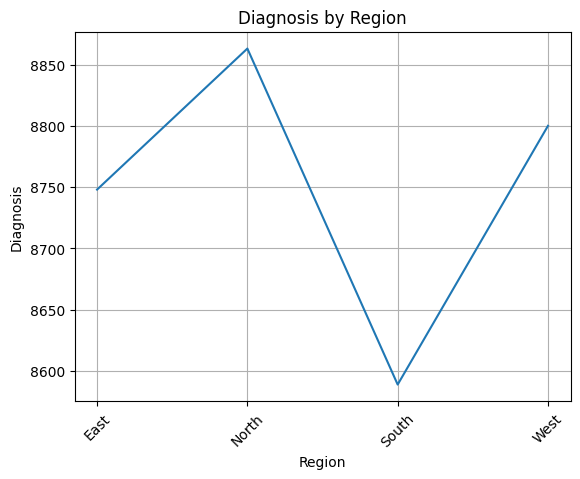

In [89]:
plt.plot(df_data['Region'],df_data['Diagnosis'])
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Diagnosis')
plt.grid(True)
plt.title('Diagnosis by Region')
plt.show()

In [90]:
import plotly.express as px

# Create choropleth map for Diagnosis counts
fig = px.choropleth(df_data,
                    locations='Region',  # Column with region names
                    locationmode='country names',  # Or 'USA-states', 'region names' depending on your data
                    color='Diagnosis',  # Column to color by
                    hover_name='Region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Diagnosis Count by Region')

In [91]:
import plotly.graph_objects as go

fig = go.Figure(go.Choropleth(
    locations=df_data['Region'],
    z=df_data['Diagnosis'],
    locationmode='country names',  # Change as needed
    colorscale='Blues',
    colorbar_title='Diagnosis Count',
))

fig.update_layout(
    title_text='Diagnosis Count by Region',
    geo=dict(
        showcoastlines=True,
    )
)

fig.show()

In [92]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('BMI Distribution', 'Cholesterol Distribution'))

# Add BMI violin plot
fig.add_trace(go.Violin(x=df['Region'],
                        y=df['BMI'],
                        name='BMI',
                        box_visible=True,
                        meanline_visible=True),
              row=1, col=1)

# Add Cholesterol violin plot
fig.add_trace(go.Violin(x=df['Region'],
                        y=df['Cholesterol'],
                        name='Cholesterol',
                        box_visible=True,
                        meanline_visible=True),
              row=1, col=2)

# Update layout
fig.update_layout(title_text='Health Metrics Distribution by Region',
                  height=600,
                  showlegend=False)

fig.show()

Statistical Insights
Tasks:
- Perform statistical analysis:
-  Calculate correlations (e.g., BMI vs. Treatment Cost).
- Conduct t-tests (e.g., cost differences between smokers and non-smokers).


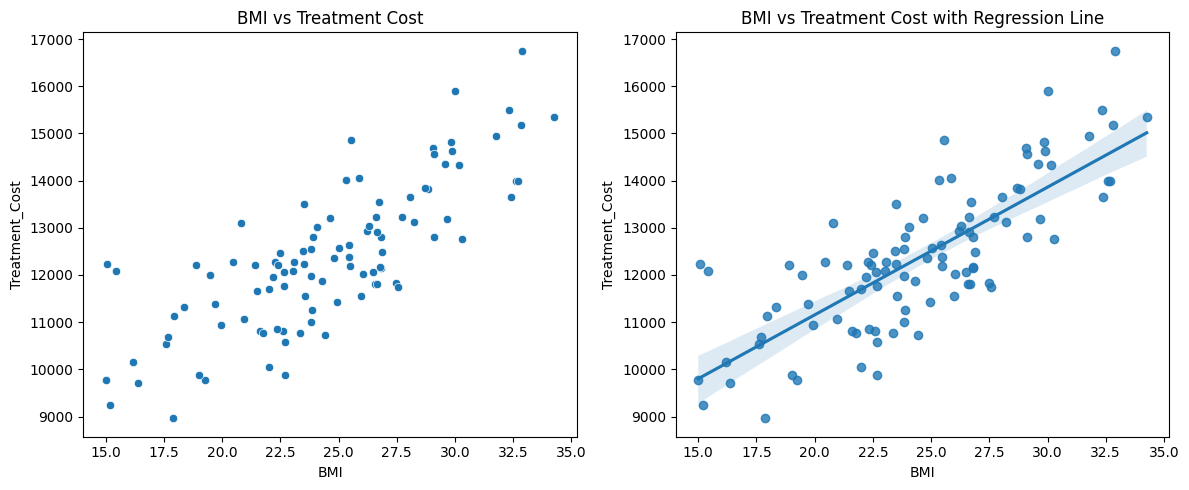


Correlation Results:
Pearson Correlation Coefficient: 0.788 (p-value: 0.0000)
Spearman Rank Correlation: 0.763 (p-value: 0.0000)

Interpretation:
There is a strong correlation between BMI and Treatment Cost.

Additional Statistics:
Average BMI: 24.5
Average Treatment Cost: $12375.83
Cost range: $8961.03 - $16755.01


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate sample data if you don't have your own dataset
def generate_sample_data(n=100):
    np.random.seed(42)
    bmi = np.random.normal(25, 5, n)  # Mean BMI 25, std dev 5
    bmi = np.clip(bmi, 15, 40)  # Clip to realistic BMI range
    # Treatment cost increases with BMI but with some randomness
    treatment_cost = 5000 + bmi * 300 + np.random.normal(0, 1000, n)
    treatment_cost = np.abs(treatment_cost)  # Ensure no negative costs
    return pd.DataFrame({'BMI': bmi, 'Treatment_Cost': treatment_cost})

# Load or generate data
# df = pd.read_csv('your_data.csv')  # Uncomment to load your own data
df = generate_sample_data()  # Using sample data for this example

# Data cleaning
# Remove any rows with missing values
df = df.dropna()

# Remove unrealistic outliers (optional)
df = df[(df['BMI'] >= 15) & (df['BMI'] <= 50)]
df = df[(df['Treatment_Cost'] > 0) & (df['Treatment_Cost'] < 20000)]

# Visualize the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='BMI', y='Treatment_Cost', data=df)
plt.title('BMI vs Treatment Cost')

plt.subplot(1, 2, 2)
sns.regplot(x='BMI', y='Treatment_Cost', data=df)
plt.title('BMI vs Treatment Cost with Regression Line')

plt.tight_layout()
plt.show()

# Calculate correlations
pearson_corr, pearson_p = stats.pearsonr(df['BMI'], df['Treatment_Cost'])
spearman_corr, spearman_p = stats.spearmanr(df['BMI'], df['Treatment_Cost'])

print("\nCorrelation Results:")
print(f"Pearson Correlation Coefficient: {pearson_corr:.3f} (p-value: {pearson_p:.4f})")
print(f"Spearman Rank Correlation: {spearman_corr:.3f} (p-value: {spearman_p:.4f})")

# Interpretation
print("\nInterpretation:")
if abs(pearson_corr) > 0.7:
    print("There is a strong correlation between BMI and Treatment Cost.")
elif abs(pearson_corr) > 0.3:
    print("There is a moderate correlation between BMI and Treatment Cost.")
else:
    print("There is a weak or no correlation between BMI and Treatment Cost.")

# Additional statistics
print("\nAdditional Statistics:")
print(f"Average BMI: {df['BMI'].mean():.1f}")
print(f"Average Treatment Cost: ${df['Treatment_Cost'].mean():.2f}")
print(f"Cost range: ${df['Treatment_Cost'].min():.2f} - ${df['Treatment_Cost'].max():.2f}")

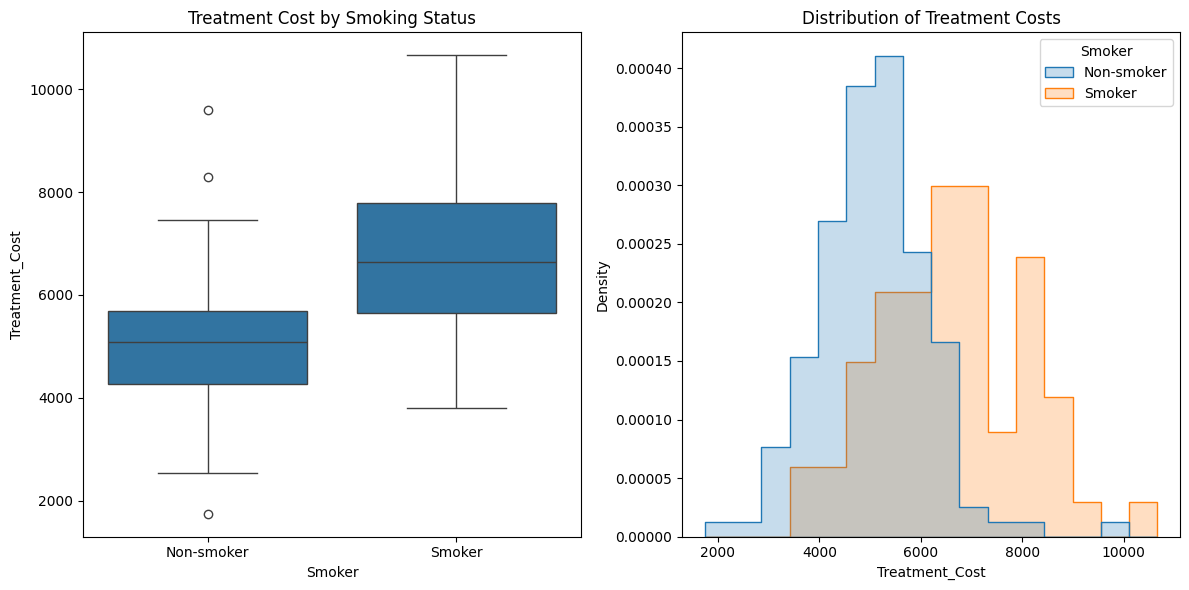


Normality Tests:
Non-smoker: W = 0.977, p = 0.0169
  → Non-smoker data does not appear normally distributed
Smoker: W = 0.988, p = 0.8033
  → Smoker data appears normally distributed

Levene's Test for Equal Variances: W = 5.716, p = 0.0177
  → Variances are unequal (consider Welch's t-test)

Welch's t-test (unequal variances) Results:
t-statistic = 7.829
p-value = 0.0000

Effect Size (Cohen's d): 1.267

Interpretation:
There is a statistically significant difference in treatment costs between smokers ($6632.51) and non-smokers ($5034.32), p = 0.0000.
The effect size is large (Cohen's d ≥ 0.8).

Descriptive Statistics:
            count         mean          std          min          25%  \
Smoker                                                                  
Non-smoker  140.0  5034.320412  1091.771324  1742.356025  4271.575602   
Smoker       60.0  6632.507577  1410.386590  3792.856110  5640.449611   

                    50%          75%           max  
Smoker                    

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate sample data if you don't have your own dataset
def generate_sample_data(n=200):
    np.random.seed(42)

    # Create smoker/non-smoker groups
    smoker = np.random.choice([0, 1], size=n, p=[0.7, 0.3])  # 30% smokers

    # Treatment costs - smokers have higher costs on average
    cost_non_smokers = np.random.normal(5000, 1000, n)
    cost_smokers = np.random.normal(6500, 1200, n)
    treatment_cost = np.where(smoker == 1, cost_smokers, cost_non_smokers)

    # Add some random noise
    treatment_cost = treatment_cost + np.random.normal(0, 500, n)
    treatment_cost = np.abs(treatment_cost)  # Ensure no negative costs

    return pd.DataFrame({'Smoker': smoker,
                         'Treatment_Cost': treatment_cost,
                         'Age': np.random.randint(18, 80, n)})

# Load or generate data
# df = pd.read_csv('your_data.csv')  # Uncomment to load your own data
df = generate_sample_data()  # Using sample data for this example

# Convert smoker to categorical for better visualization
df['Smoker'] = df['Smoker'].map({0: 'Non-smoker', 1: 'Smoker'})

# Data cleaning
# Remove any rows with missing values
df = df.dropna()

# Remove unrealistic outliers (optional)
df = df[(df['Treatment_Cost'] > 0) & (df['Treatment_Cost'] < 20000)]

# 1. Visualize the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Smoker', y='Treatment_Cost', data=df)
plt.title('Treatment Cost by Smoking Status')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Treatment_Cost', hue='Smoker', element='step', stat='density', common_norm=False)
plt.title('Distribution of Treatment Costs')
plt.tight_layout()
plt.show()

# 2. Check assumptions for t-test

# Check normality using Shapiro-Wilk test
print("\nNormality Tests:")
for group in df['Smoker'].unique():
    group_data = df[df['Smoker'] == group]['Treatment_Cost']
    stat, p = stats.shapiro(group_data)
    print(f"{group}: W = {stat:.3f}, p = {p:.4f}")
    if p > 0.05:
        print(f"  → {group} data appears normally distributed")
    else:
        print(f"  → {group} data does not appear normally distributed")

# Check homogeneity of variance using Levene's test
levene_stat, levene_p = stats.levene(
    df[df['Smoker'] == 'Smoker']['Treatment_Cost'],
    df[df['Smoker'] == 'Non-smoker']['Treatment_Cost']
)
print(f"\nLevene's Test for Equal Variances: W = {levene_stat:.3f}, p = {levene_p:.4f}")
if levene_p > 0.05:
    print("  → Variances are equal (homoscedasticity assumption holds)")
else:
    print("  → Variances are unequal (consider Welch's t-test)")

# 3. Perform appropriate t-test
if levene_p > 0.05:
    # Standard Student's t-test (equal variances)
    t_stat, p_value = stats.ttest_ind(
        df[df['Smoker'] == 'Smoker']['Treatment_Cost'],
        df[df['Smoker'] == 'Non-smoker']['Treatment_Cost'],
        equal_var=True
    )
    test_type = "Student's t-test (equal variances)"
else:
    # Welch's t-test (unequal variances)
    t_stat, p_value = stats.ttest_ind(
        df[df['Smoker'] == 'Smoker']['Treatment_Cost'],
        df[df['Smoker'] == 'Non-smoker']['Treatment_Cost'],
        equal_var=False
    )
    test_type = "Welch's t-test (unequal variances)"

# 4. Display results
print(f"\n{test_type} Results:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_value:.4f}")

# Calculate effect size (Cohen's d)
smoker_mean = df[df['Smoker'] == 'Smoker']['Treatment_Cost'].mean()
non_smoker_mean = df[df['Smoker'] == 'Non-smoker']['Treatment_Cost'].mean()

pooled_std = np.sqrt(
    (df[df['Smoker'] == 'Smoker']['Treatment_Cost'].std()**2 +
     df[df['Smoker'] == 'Non-smoker']['Treatment_Cost'].std()**2) / 2
)

cohen_d = (smoker_mean - non_smoker_mean) / pooled_std
print(f"\nEffect Size (Cohen's d): {cohen_d:.3f}")

# 5. Interpret results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"There is a statistically significant difference in treatment costs between smokers (${smoker_mean:.2f}) "
          f"and non-smokers (${non_smoker_mean:.2f}), p = {p_value:.4f}.")
    if cohen_d >= 0.8:
        print("The effect size is large (Cohen's d ≥ 0.8).")
    elif cohen_d >= 0.5:
        print("The effect size is medium (0.5 ≤ Cohen's d < 0.8).")
    else:
        print("The effect size is small (Cohen's d < 0.5).")
else:
    print("There is no statistically significant difference in treatment costs between smokers and non-smokers.")

# 6. Additional descriptive statistics
print("\nDescriptive Statistics:")
print(df.groupby('Smoker')['Treatment_Cost'].describe())

In [95]:
df.shape

(200, 3)